In [2]:
import pandas as pd
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Zomato data .csv")

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
df.describe(include='all')

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148,148.000000,148.000000,148
unique,145,2,2,20,NaN,NaN,4
top,San Churro Cafe,No,No,3.8/5,NaN,NaN,Dining
freq,2,90,140,19,NaN,NaN,110
mean,NaN,NaN,NaN,NaN,264.810811,418.243243,NaN
std,NaN,NaN,NaN,NaN,653.676951,223.085098,NaN
min,NaN,NaN,NaN,NaN,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,NaN,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,NaN,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,NaN,221.750000,600.000000,NaN


In [24]:
#Convert the data type rate column making it float
def handleRate(value): 
    value = str(value).split('/')
    value = value[0];
    return float (value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


1. What type of restaurant do the majority of customers order from?

In [41]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

Text(0.5, 0, 'Type of Restaurant')

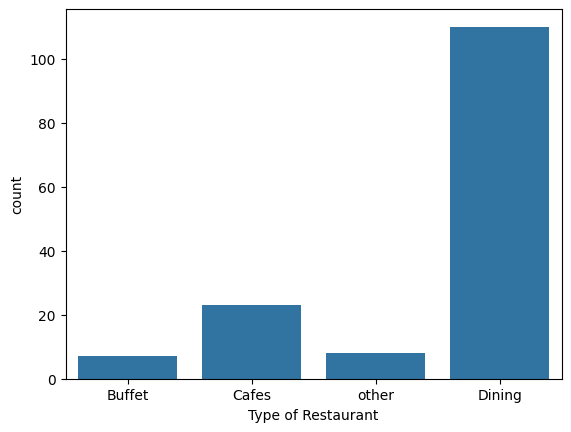

In [42]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

2. How many votes has each type of restaurant received from customers?

In [45]:
df.head()
group_data = df.groupby('listed_in(type)')['votes'].sum()
group_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'Vote')

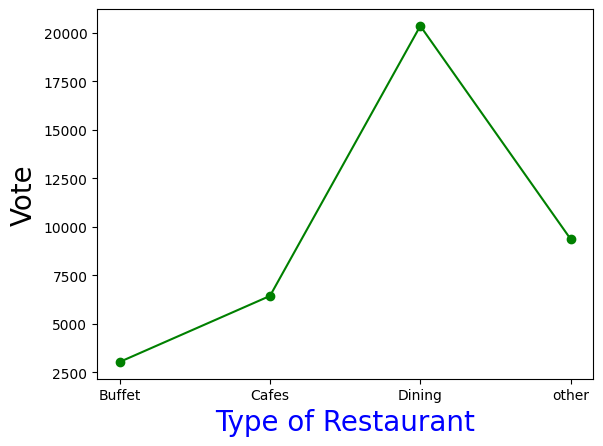

In [55]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data }) 
plt.plot(result, c = "green" ,marker = "o")
plt.xlabel("Type of Restaurant", c="blue" , size = 20)
plt.ylabel("Vote" , c="black" , size = 20)

3. What are the ratings that the majority of restaurants have received?

In [76]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [87]:
df['rate'].mode()

0    3.8
Name: rate, dtype: float64

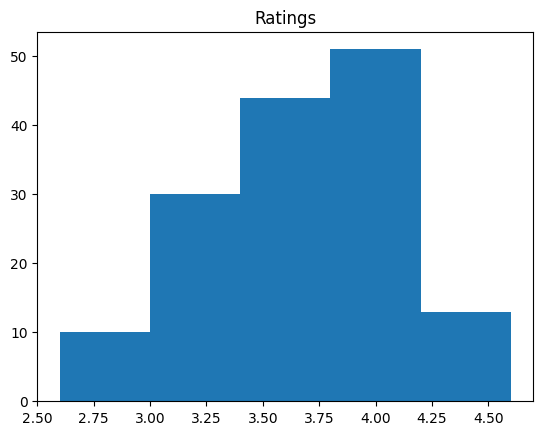

In [75]:
plt.hist(df['rate'],bins =5)
plt.title("Ratings")
plt.show()

4. Zomato has observed that most couples order most of their food online. What is their
average spending on each order?

In [85]:
df['approx_cost(for two people)'].mode()

0    300
Name: approx_cost(for two people), dtype: int64

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

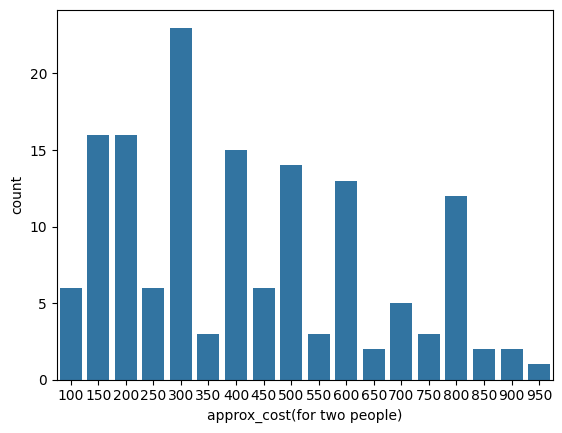

In [84]:
copule_data = df['approx_cost(for two people)']
sns.countplot(x=copule_data)

5. Which mode (online or offline) has received the maximum rating?


In [89]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [100]:
group_data = df.groupby('online_order')['rate'].mean()
group_data

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64

<Axes: xlabel='online_order', ylabel='rate'>

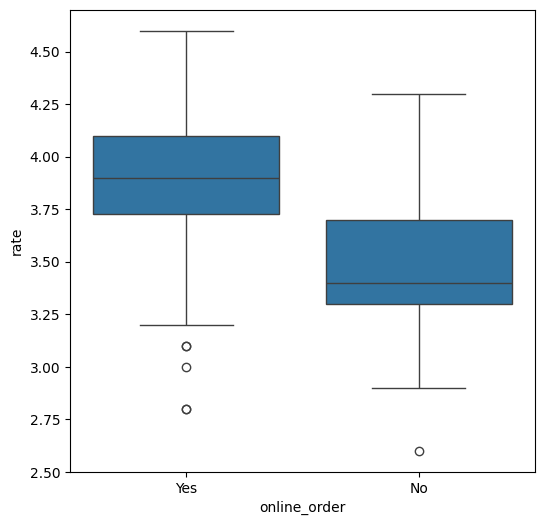

In [93]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y = 'rate',data = df)

6. Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?

In [101]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

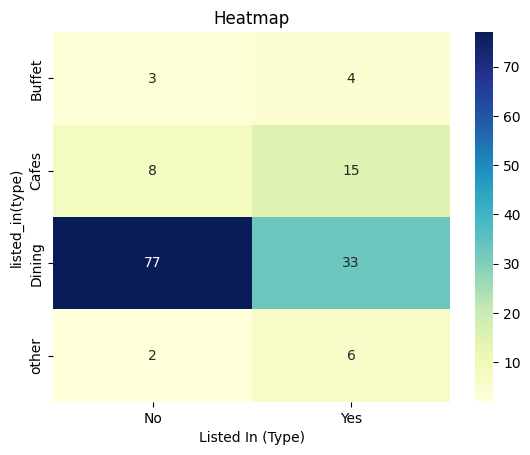

In [104]:
pivot_table = df.pivot_table(index = 'listed_in(type)' , columns = 'online_order' , aggfunc ='size' , fill_value=0)
sns.heatmap(pivot_table , annot = True, cmap = "YlGnBu" , fmt ='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.xlabel("Listed In (Type)")
plt.show()